In [1]:
source('wapo_stats.R', echo=F)

Loading required package: pacman


# WashingtonPost Analytics

## Introduction

This is a documentation about the analysis of TREC's WashingtonPost corpus.

The TREC Washington Post Corpus contains 608,180 news articles and blog posts from January 2012 through August 2017. The articles are stored in JSON format and include title, byline, date of publication, kicker (a section header), article text broken into paragraphs, links to embedded images and multimedia. Each document is identified by JSON field "id".

The main content of the document is distributed in paragraphs, inside "contents" JSON array, only the objects with subtype are "paragraph". There may be duplicated documents (same id, or same text).

## Text distribuition analysis

Next table shows the characters length of complete text (all paragraphs) and the first three paragraphs.

In [2]:
doc_length

doc_id,doc_len,par_len
b2e89334-33f9-11e1-825f-dabc29fd7071,4522,658
749ec5b2-32f5-11e1-825f-dabc29fd7071,3883,632
69654742-33d7-11e1-825f-dabc29fd7071,9560,999
d5966ad2-33f9-11e1-825f-dabc29fd7071,4886,862
f2c10c06-2c0c-11e1-9952-55d90a4e2d6d,7243,651
4db820a0-3251-11e1-8c61-c365ccf404c5,8929,661
2ee2b1ca-33d9-11e1-a274-61fcdeecc5f5,7359,756
a9552634-2c06-11e1-9952-55d90a4e2d6d,9504,764
7cecbc12-33de-11e1-a274-61fcdeecc5f5,8638,1052
153127ee-341e-11e1-825f-dabc29fd7071,5053,740


The results about the distribution of the size of text between all paragraphs and the three first paragraphs are shown below.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


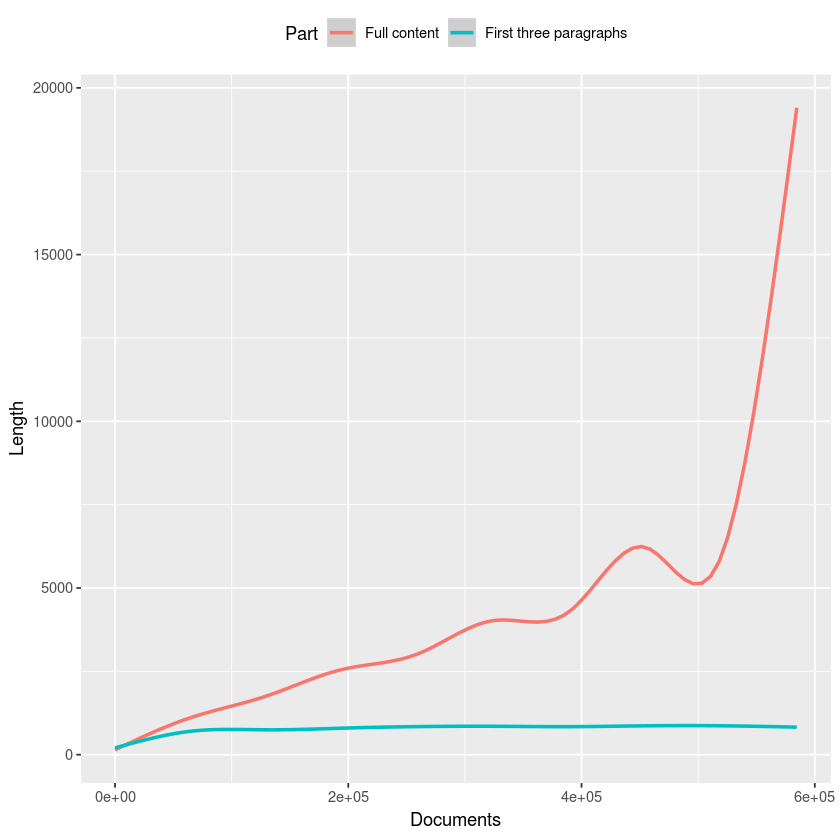

In [3]:
plot_data(doc_length)

The X-axis shows the list of documents and the Y-axis shows the length in a number of characters of each document. Red line represents the number of characters for the full content of the text (all paragraphs) and the blue line represents the number of characters of only the first three paragraphs of each document. Is using a smooth line for a better understanding of the graph.

## Features distribuition analysis

### Description

Discretization of features consist in reduce the number of information/values obtained in each one.

Features included:
<ul>
<li>Keywords: list of sentences included exactly in the text. Each sentence have around 3 and 6 terms, and have a weight (double numerical value between 1.0 and 50.0). Discretization: sentence with 2 words or less, and weight more than 5.0.</li>
<li>NamedEntities: list of named entities. Discretization: the list of named entities included in top 20 analysis.</li>
<li>SentimentAnalysis: polarity value, posible values are postive, negative or neutral. Discretization: no.</li>
<li>ReadingComplexity: Flesch–Kincaid score value (double between 0.0 and 100.0). Low score is more harder to read. Discretization: categorization of scores in (1).</li>
<li>EmotionCategories: list emotions with a weight double value between 0.0 and 1.0. Emotions are: wordnet affect emotion categories(2). Discretization: emotion with more than 0.1 weight.</li></ul>

(1) Flesch–Kincaid levels:
http://pages.stern.nyu.edu/~wstarbuc/Writing/Flesch.htm
https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch_reading_ease
<ul><li>90 to 100: 5th_grade</li>
<li>80 to 90: 6th_grade</li>
<li>70 to 80: 7th_grade</li>
<li>60 to 70: 8th_and_9th_grade</li>
<li>50 to 60: 10th_to_12th_grade (high school)</li>
<li>30 to 50: college</li>
<li>0 to 30: college_graduate</li></ul>

(2) wordnet affect emotion categories: http://www.gsi.dit.upm.es/ontologies/wnaffect/fulltree.html

Tools for process features:
<ul>
<li>Keywords: RAKE, weight is co-ocurrence degree of word/frequency of word</li>
<li>NamedEntities: armyant, list of categories+(3).</li>
<li>SentimentAnalysis:.</li>
<li>ReadingComplexity: textstat, Flesch–Kincaid ease.</li>
<li>EmotionCategories:.</li></ul>
